Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [3]:
import pandas as pd

1. Загрузить файл hr.csv

In [36]:
df = pd.read_csv("hr.csv")
df

# satisfaction_level - уровень удовлетворенности
# last_evaluation - последняя оценка
# number_project - номер проекта
# average_montly_hours - средние часы в месяц
# time_spend_company - стаж работы в компании
# Work_accident - несчастный случай на работе
# left - уволен
# promotion_last_5years - повышения за последние 5 лет
# sales - отдел
# salary - зарплата

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [79]:
df_statistics = df.describe()
df_statistics
#среднее - mean, 
# медиана - 50%, 
# мин/макс - min|max
# сред. отклонение - std

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [116]:
#мода
df_mode = df.mode().reset_index()
df_mode_stat = df_mode[(df_mode['index'] == 0)]
df_mode_stat

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [282]:
import matplotlib.pyplot as plt
import seaborn as sb

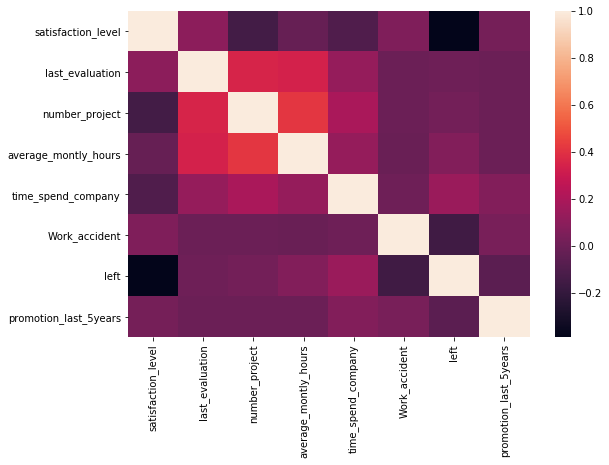

In [317]:
plt.figure(figsize=(9, 6))
corr = df.corr()
sb.heatmap(corr)

4. Визуализировать несколько взаимосвязей между переменными

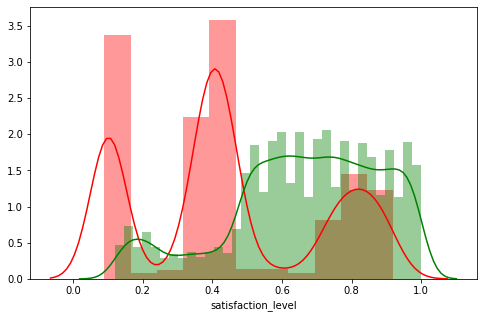

In [348]:
plt.figure(figsize=(8, 5))
sb.distplot(df[df['left'] == 1]['satisfaction_level'], label='Уволенные', color='Red')
sb.distplot(df[df['left'] == 0]['satisfaction_level'], label='Работающие', color='Green')

На графике выше, так же, как и на графике коррекляции в задании №3(heatmap), прослеживается зависимость между параметрами left и satisfaction_level. Чем ниже показатель удовлетворенности работника своей работой, тем больше вероятность того, что он уволится

Text(0.5, 1.0, 'Зависимость между отработанным временем и оценкой')

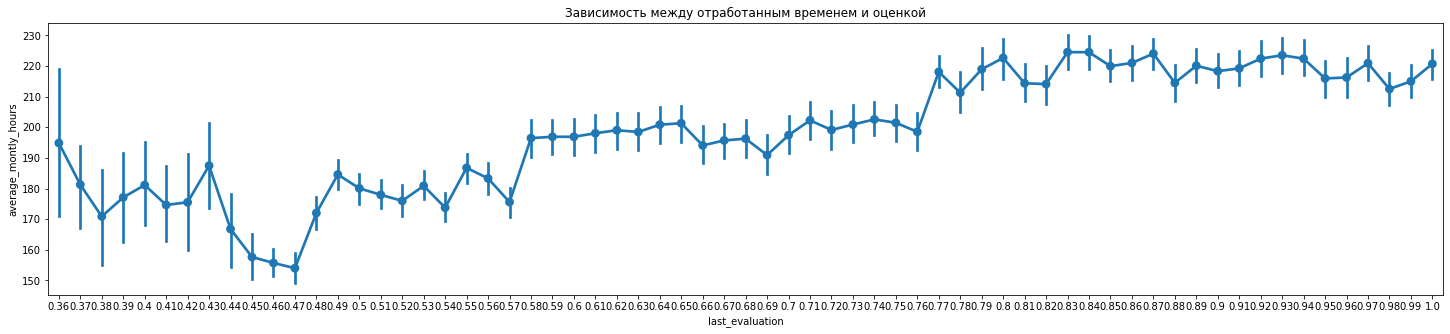

In [366]:
plt.figure(figsize=(25, 5))
sb.pointplot(x = 'last_evaluation', y = 'average_montly_hours', data = df)
plt.title('Зависимость между отработанным временем и оценкой')

Из графика выше видна зависимость между средним количеством отработанного времени и оценкой: Прямая зависимость - чем больше времени провел сотрудник за работой, тем выше оценка

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [369]:
from scipy import stats

In [372]:
left = df['left']
time_spend_company = df['time_spend_company']
stats.ttest_ind(left, time_spend_company)

Ttest_indResult(statistic=-262.50803476202543, pvalue=0.0)

In [373]:
satisfaction_level = df['satisfaction_level']
last_evaluation = df['last_evaluation']
stats.ttest_ind(satisfaction_level, last_evaluation)

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

Вывод: 

За нулевую гипотезу примем то, что статистических различий между выборками нет.
Если различия существуют, то для того, чтобы считать их статистически значимыми p-value должно быть менее 0.05 

pvalue=0.0 - результаты t-test'а являются статистически значимыми (p < 0.05).


6. Рассчитать сколько работников работает в каждом департаменте

In [142]:
df_count_workers = df['sales'].value_counts()
df_count_workers

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

7. Показать распределение сотрудников по зарплатам

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

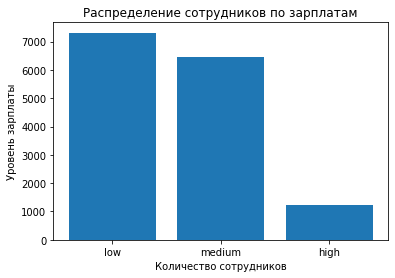

In [268]:
levels_of_salary = df['salary'].value_counts().reset_index()
plt.bar(levels_of_salary['index'], levels_of_salary['salary'])
plt.xlabel('Количество сотрудников')
plt.ylabel('Уровень зарплаты')
plt.title('Распределение сотрудников по зарплатам')

8. Показать распределение сотрудников по зарплатам совместно с департаментами

Text(0, 0.5, 'Количество сотрудников')

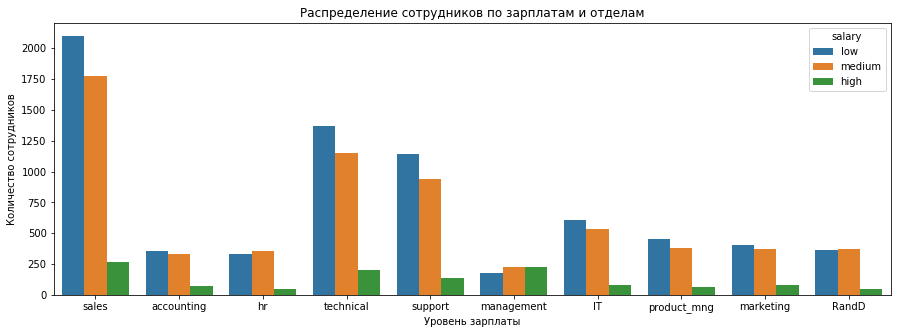

In [307]:
plt.figure(figsize=(15, 5))
sb.countplot(x = 'sales', hue = 'salary', data = df)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')

9. Сколько сотрудников покинули компанию

In [271]:
df_left = df['left'].value_counts().reset_index()
df_left_ = df_left[(df_left['index'] == 1)].left
df_left_

1    3571
Name: left, dtype: int64

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Гипотеза №1:

Сравним уровень удовлетворенности работой уволенных сотрудников и работающих сотрудников

In [376]:
left = df[df['left']==0]['satisfaction_level']
work = df[df['left']==1]['satisfaction_level']
stats.ttest_ind(left, work)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

За нулевую гипотезу примем то, что статистических различий между выборками нет. Если различия существуют, то для того, чтобы считать их статистически значимыми p-value должно быть менее 0.05

Т.к. pvalue=0.0 - результаты t-test'а являются статистически значимыми (p < 0.05). Чем ниже уровень удовлетворенности работой, тем выше вероятность увольнения 

Гипотеза №2:

Сравним повышения по уволенным и работающим сотрудникам

In [380]:
left_1 = df[df['left']==0]['promotion_last_5years']
work_1 = df[df['left']==1]['promotion_last_5years']
stats.ttest_ind(left_1, work_1)

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)

За нулевую гипотезу примем то, что статистических различий между выборками нет. Если различия существуют, то для того, чтобы считать их статистически значимыми p-value должно быть менее 0.05

Т.к. pvalue=3,62 - результаты t-test'а не являются статистически значимыми (p > 0.05). 